In [1]:
import pandas as pd
import numpy as np
!pip install tensorflow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [2]:
df=pd.read_csv("D:/FactoryProject/Rila_Project/city_day.csv")

In [3]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
# df = pd.read_csv('data.csv')  # Replace with your dataset path

# Drop irrelevant columns (if any)
df = df.drop(columns=['City', 'Date'], errors='ignore')  # Drop 'City' and 'Date' if not useful

# Handle missing values:
# 1. Fill missing values in numeric columns with mean
df_numeric = df.select_dtypes(include=[np.number])  # Select only numeric columns
df[df_numeric.columns] = df_numeric.fillna(df_numeric.mean())  # Fill missing values with mean for numeric columns

# 2. Handle missing values in non-numeric columns (e.g., categorical), if any, using the mode
df_non_numeric = df.select_dtypes(exclude=[np.number])  # Select non-numeric columns
df[df_non_numeric.columns] = df_non_numeric.fillna(df_non_numeric.mode().iloc[0])  # Use the mode for categorical columns

# Encoding categorical columns (e.g., 'AQI Category')
# First, check if there are any categorical columns that need encoding
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding for categorical columns
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Define features (X) and target (y)
X = df.drop(columns=['AQI'])  # Features (drop the target variable)
y = df['AQI']  # Target (AQI column)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert target to numpy array
y_train = np.array(y_train)
y_test = np.array(y_test)

# Build the Deep Learning model
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),  # Input layer
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.3),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
train_loss, train_mae = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)

print(f"Train MAE: {train_mae}, Test MAE: {test_mae}")

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


C:\Users\mohamad rila\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 22759.2051 - mae: 106.6619 - val_loss: 3687.3494 - val_mae: 36.8839
Epoch 2/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 5426.7002 - mae: 42.0675 - val_loss: 3021.6511 - val_mae: 32.6084
Epoch 3/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 4199.4409 - mae: 38.0809 - val_loss: 2807.4456 - val_mae: 30.3215
Epoch 4/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 4055.9470 - mae: 36.1575 - val_loss: 2648.6899 - val_mae: 28.5974
Epoch 5/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 3594.1650 - mae: 35.1454 - val_loss: 2562.5354 - val_mae: 26.9593
Epoch 6/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 3381.5017 - mae: 33.8088 - val_loss: 2404.5852 - val_mae: 25.7685
Epoch 7/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 3778.7820 - mae: 34.9420 - val_loss: 2483.2292 - val_mae: 24.9273
Epoch 8/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 3368.4297 - mae: 33.6845 - val_loss: 2407.5391 

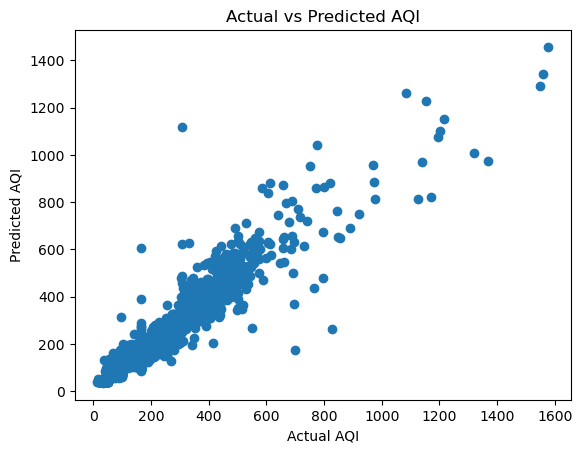

In [6]:
import matplotlib.pyplot as plt

# Plotting predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI")
plt.show()


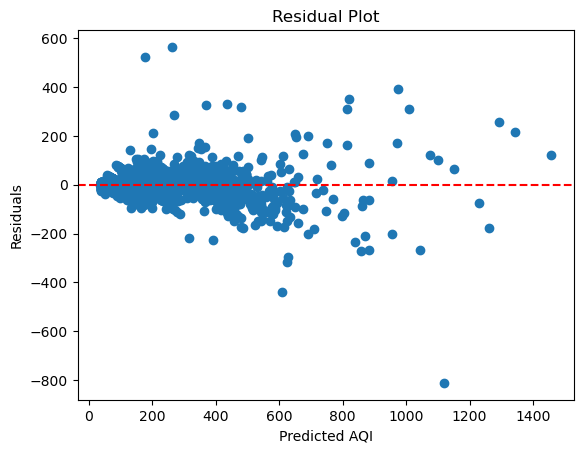

In [7]:
# Calculate residuals
residuals = y_test - y_pred.flatten()  # Flatten y_pred if it's a 2D array

# Ensure both arrays (y_pred and residuals) have the same size
plt.scatter(y_pred.flatten(), residuals)  # Scatter plot of predicted values vs residuals
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at 0
plt.xlabel("Predicted AQI")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


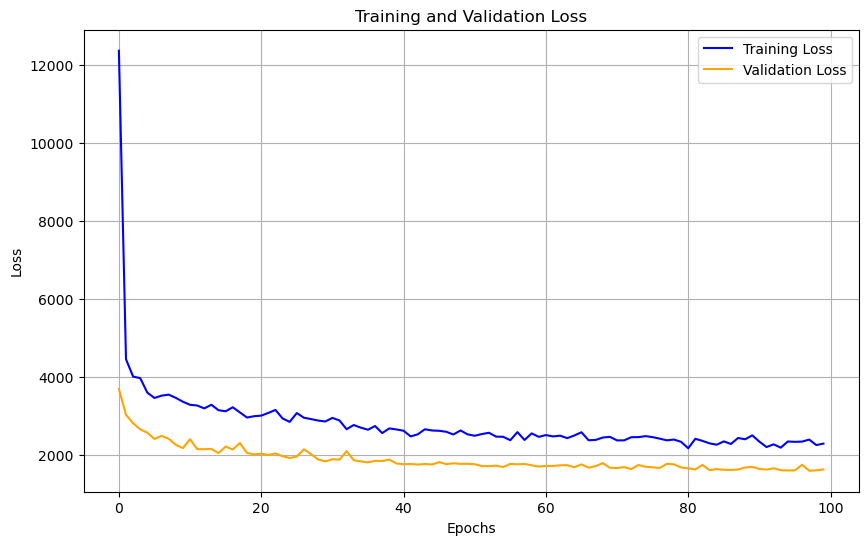

In [8]:
#Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

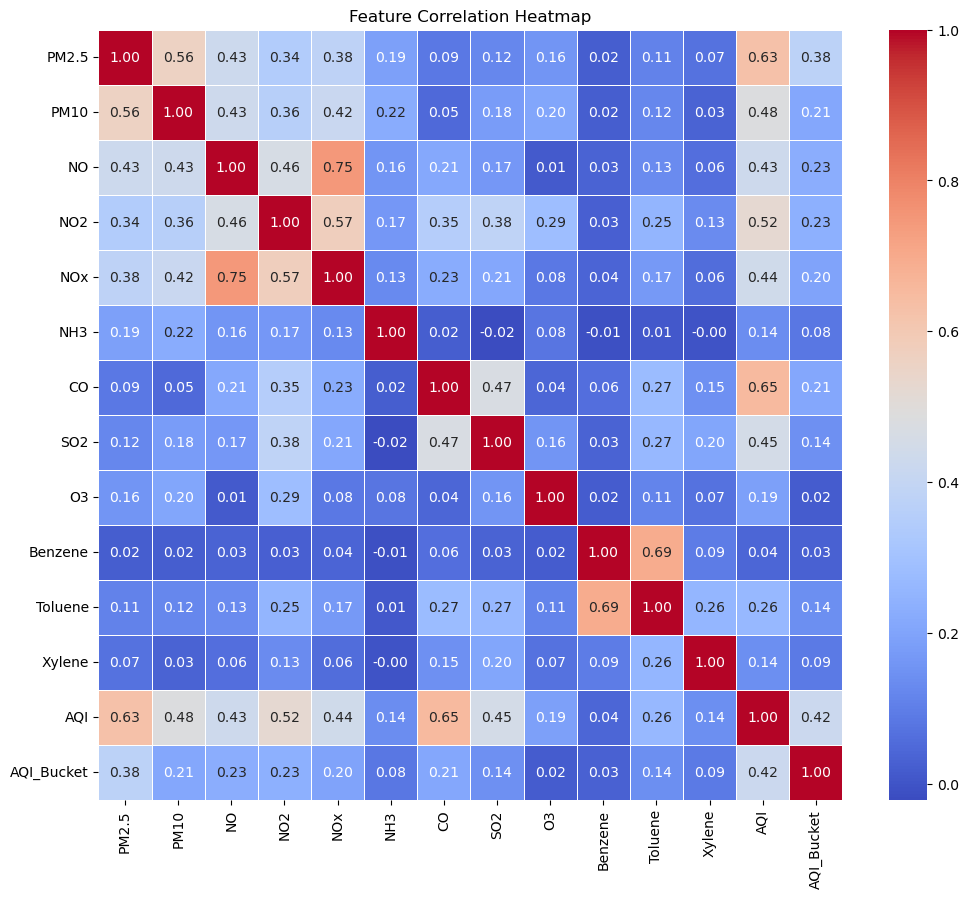

In [9]:
#Feature Correlation Heatmap
import seaborn as sns  # Ensure seaborn is imported
import matplotlib.pyplot as plt  # Import matplotlib 
# Feature Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure seaborn is imported
sns.set(style="whitegrid")

#Scatter Plots for Numerical Variables
numeric_columns = df.select_dtypes(include=[np.number]).columns

for col in numeric_columns:
    if col != 'AQI':  # Skip the target variable
        plt.figure(figsize=(8, 6))
        plt.scatter(df[col], df['AQI'], alpha=0.6, color='teal')
        plt.title(f'Scatter Plot of {col} vs AQI')
        plt.xlabel(col)
        plt.ylabel('AQI')
        plt.grid(True)
        plt.show()

#Box Plots for Categorical Variables
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col], y=df['AQI'], palette='viridis')
    plt.title(f'Box Plot of {col} vs AQI')
    plt.xlabel(col)
    plt.ylabel('AQI')
    plt.xticks(rotation=45)  # Rotate category names for readability
    plt.show()

#Correlation Bar Plot for Numerical Variables
correlations = df.corr()['AQI'].drop('AQI')  # Drop the self-correlation
plt.figure(figsize=(10, 6))
correlations.sort_values().plot(kind='barh', color='salmon')
plt.title('Correlation of Numerical Variables with AQI')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import math

# Calculate additional evaluation metrics
y_pred = model.predict(X_test)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R2 Score
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred)
print(f"Explained Variance Score: {explained_variance}")


In [ ]:
import numpy as np

# Function to test model with custom input
def test_model(model, scaler, input_data):
    # Preprocess the input data (apply the same scaling as training data)
    input_data_scaled = scaler.transform(input_data)

    # Make predictions
    prediction = model.predict(input_data_scaled)

    return prediction

# Example of testing with a new input (ensure this matches the number of features used in training)
# Suppose the model uses 13 features: replace these values with the actual input you want to test
new_input = np.array([[25.0, 60.0, 1015.0, 5.0, 15.0, 30.0, 50.0, 75.0, 120.0, 35.0, 10.0, 200.0, 5.0]])

# Test the model
predicted_aqi = test_model(model, scaler, new_input)

# Output the prediction
print(f"Predicted AQI: {predicted_aqi[0][0]}")  # Output the predicted value (first item in the array)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

# Function to evaluate model performance
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Predict on train and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate evaluation metrics for train data
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = math.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)

    # Calculate evaluation metrics for test data
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = math.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print all evaluation metrics
    print("Train Metrics:")
    print(f"  MAE: {train_mae}")
    print(f"  MSE: {train_mse}")
    print(f"  RMSE: {train_rmse}")
    print(f"  R2 Score: {train_r2}")

    print("\nTest Metrics:")
    print(f"  MAE: {test_mae}")
    print(f"  MSE: {test_mse}")
    print(f"  RMSE: {test_rmse}")
    print(f"  R2 Score: {test_r2}")

# Call the evaluation function with the model, training data, and test data
evaluate_model(model, X_train, y_train, X_test, y_test)


In [ ]:
pip install twilio


In [4]:
# Twilio credentials (replace with your own)
ACCOUNT_SID = '1234567890'  # Replace with your Twilio Account SID
AUTH_TOKEN = '12344567890'    # Replace with your Twilio Auth Token
TWILIO_PHONE_NUMBER = '1234567890'  # Use a valid Twilio phone number from your Twilio Console
TO_PHONE_NUMBER = '1234567890'  # Replace with the recipient's phone number (in correct format with country code)

# Function to send SMS with Twilio
def send_sms(message):
    client = Client(ACCOUNT_SID, AUTH_TOKEN)
    client.messages.create(
        body=message,
        from_=TWILIO_PHONE_NUMBER,
        to=TO_PHONE_NUMBER
    )

# Prepare the SMS message
sms_message = (
    f"Model Evaluation Complete:\n"
    f"Caution: Chemical Vapors Detected!:\n"
    f"Train MAE: {train_mae:.2f}, Test MAE: {test_mae:.2f}\n"
    f"MSE: {mse:.2f}, R2 Score: {r2:.2f}"
)

# Send the message via Twilio
try:
    send_sms(sms_message)
    print("Evaluation results sent via SMS.")
except Exception as e:
    print(f"Failed to send SMS: {e}")


NameError: name 'train_mae' is not defined